In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

mnist = fetch_openml('mnist_784')
inputData, y = mnist["data"], mnist["target"]


In [87]:
inputData = inputData / 255
nDigits = 10

In [88]:
yOneHot = np.zeros([inputData.shape[0],nDigits ])

In [91]:
for i in range(y.shape[0]):
    yOneHot[i, int(y[i])] = 1
y = yOneHot

In [92]:
m = 60000 # training data size
m_test = y.shape[0] - m

In [93]:
y_train, y_test = y[:m,:].reshape(m, nDigits), y[m:,:].reshape(m_test, nDigits)
inputDataTrain, inputDataTest = inputData[:m,:], inputData[m:,:] 

In [94]:
np.random.seed(1002)

In [95]:
y[14000,:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


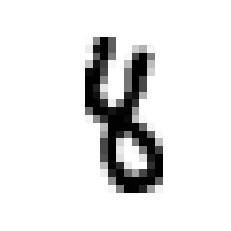

In [96]:
i = 7000
plt.imshow(inputDataTrain[i,:].reshape(28,28), cmap=matplotlib.cm.binary)
plt.axis('off')
print(y_train[i,:])

In [97]:
# Define activation, loss, and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU is very simple

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [99]:
inputDim = inputDataTrain.shape[1]
nHidden = 64
learning_rate = 1
weight_decay = 0.001

W1 = 0.01*np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))

inputData = inputDataTrain
y = y_train

Epoch 0 cost:  2.3025926683067466
Epoch 10 cost:  1.3575995606291273
Epoch 20 cost:  1.5435466738823695
Epoch 30 cost:  1.0957404033898497
Epoch 40 cost:  0.9177537929316519
Epoch 50 cost:  0.5149939683130837
Epoch 60 cost:  0.6243709546087004
Epoch 70 cost:  0.4456593955103826
Epoch 80 cost:  0.34769817510400725
Epoch 90 cost:  0.32513709831928167


<function matplotlib.pyplot.show(*args, **kw)>

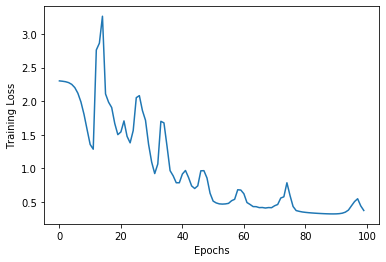

In [100]:
nEpochs = 100
costPlot = np.zeros(nEpochs)
for i in range(nEpochs):
    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

Epoch 0 cost:  0.329891775636911
Epoch 10 cost:  0.3123473507568256
Epoch 20 cost:  0.310330181864618
Epoch 30 cost:  0.30911785158181876
Epoch 40 cost:  0.3082183762473963
Epoch 50 cost:  0.3075275716144661
Epoch 60 cost:  0.30701548213754776
Epoch 70 cost:  0.3066469460401661
Epoch 80 cost:  0.30639012625800144
Epoch 90 cost:  0.3062335473681011


<function matplotlib.pyplot.show(*args, **kw)>

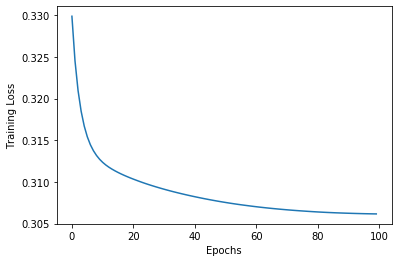

In [101]:
# changing learning rate
learning_rate = 0.1
nEpochs = 100
costPlot = np.zeros(nEpochs)
for i in range(nEpochs):
    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

In [103]:
Z1 = np.matmul(W1, inputDataTest.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2,axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))

[[ 960    0   13    4    1    9   11    3    8   13]
 [   0 1110    5    2    3    2    3   13   10    6]
 [   1    1  926   25    2    4    4   24    9    2]
 [   0    4   10  904    0   39    0    4   15    9]
 [   0    0   18    1  919    9   16    9   11   46]
 [   3    1    1   37    0  764   16    0   21   11]
 [   9    4   13    2   11   15  902    0   10    1]
 [   2    1   13   12    2    7    0  946    9   20]
 [   4   14   30   16    5   36    6    3  866    6]
 [   1    0    3    7   39    7    0   26   15  895]]


In [104]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1022
           1       0.98      0.96      0.97      1154
           2       0.90      0.93      0.91       998
           3       0.90      0.92      0.91       985
           4       0.94      0.89      0.91      1029
           5       0.86      0.89      0.88       854
           6       0.94      0.93      0.94       967
           7       0.92      0.93      0.93      1012
           8       0.89      0.88      0.88       986
           9       0.89      0.90      0.89       993

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

